In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [9]:
df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";")
df

Number_Ranks  Number_Threads  Nodes_X_Threads        P1        P2  \
0              1               1                1    1.0000    1.0000   
1              1               2                2    1.5667    1.8492   
2              1               4                4    2.9058    3.4985   
3              1               8                8    5.0137    6.6092   
4              1              16               16    6.8764   10.6653   
5              1              20               20    5.8428   12.4293   
6              1              40               40    8.4904   13.3687   
7              2               1                2    1.9094    1.9299   
8              2               2                4    2.8111    3.5078   
9              2               4                8    4.7360    6.5273   
10             2               8               16    7.1483   11.8762   
11             2              16               32    9.8465   17.1621   
12             2              20               40   10.4025   17.4030   
13             2              40               80   14.7503   21.1818   
14             4               1                4    4.2580    4.1234   
15             4               2                8    5.9780    7.3404   
16             4               4               16   10.8074   13.8262   
17             4               8               32   17.0077   24.7511   
18             4              16               64   20.0268   34.9694   
19             4              20               80   22.0550   36.0056   
20             4              40              160   30.8630   36.0943   
21             8               1                8    7.9336    7.8393   
22             8               2               16   11.1071   14.2103   
23             8               4               32   16.8862   25.2408   
24             8               8               64   26.5288   43.6200   
25             8              16              128   32.1960   67.6869   
26             8              20              160   37.4314   63.9023   
27             8              40              320   45.2638   68.6773   
28            16               1               16   15.9496   16.5719   
29            16               2               32   20.5797   30.6850   
30            16               4               64   35.9058   58.2371   
31            16               8              128   47.4119  102.9929   
32            16              16              256   57.2077  165.9562   
33            16              20              320   58.5912  142.1988   
34            16              40              640   73.8643  203.5312   
35            20               1               20   19.8261   20.7971   
36            20               2               40   26.4203   38.1313   
37            20               4               80   45.8854   74.7559   
38            20               8              160   56.7721  134.4267   
39            20              16              320   77.5900  201.2002   
40            20              20              400   76.6693  192.3265   
41            20              40              800   76.6693  265.8313   
42            25               1               25   25.0025   26.2640   
43            25               2               50   32.1000   47.6900   
44            25               4              100   52.5257   85.4695   
45            25               8              200   75.4163  152.3836   
46            25              16              400   78.1532  266.4072   
47            25              20              500  101.0531  226.6376   
48            25              40             1000   81.0284  300.3751   
49            30               1               30   32.4005   34.4772   
50            30               2               60   43.5942   62.0452   
51            30               4              120   63.3398  111.3286   
52            30               8              240  100.0103  197.3894   
53            30              16              480   92.2074  3

In [3]:
df.columns

Index(['Number_Ranks', 'Number_Threads', 'Nodes_X_Threads', 'P1', 'P2', 'P4'], dtype='object')

In [4]:
num_ranks = df['Number_Ranks'].unique()
num_threads = df['Number_Threads'].unique()

print(f'num_ranks: {num_ranks}, shape: {num_ranks.shape}')
print(f'num_threads: {num_threads}, shape: {num_threads.shape}')

num_ranks: [ 1  2  4  8 16 20 25 30], shape: (8,)
num_threads: [ 1  2  4  8 16 20 40], shape: (7,)


In [5]:
xx, yy = np.meshgrid(num_ranks, num_threads)
x, y = xx.ravel(), yy.ravel()

rank, threads, speed_up = [], [], []

for i, j in zip(x, y):
    z = df[(df['Number_Ranks'] == i) & (df['Number_Threads'] == j)]['P1'].values
    if z:
        speed_up.append(z[0])
        rank.append(i)
        threads.append(j)

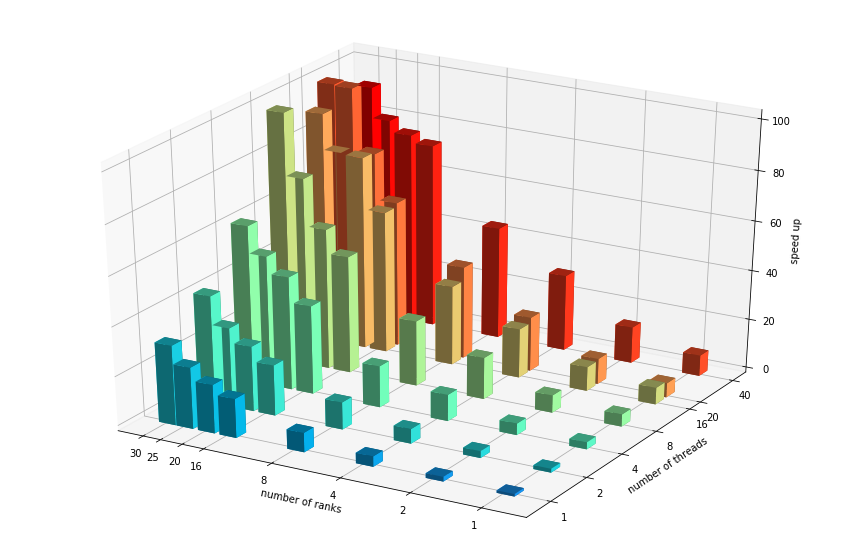

In [11]:
# log scale
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
colors = cm.rainbow([0.2 + (1-0.2)/(len(rank)-1)*i for i in range(len(rank))])

width = 1/4
ax.bar3d(np.log2(rank) - width,
         np.log2(threads) - width,
         [0] * len(speed_up),
         width, width, speed_up, colors)

ax.invert_xaxis()
# ax.invert_yaxis()
ax.set_xticks(np.log2(num_ranks))
ax.set_xticklabels(num_ranks)
ax.set_xlabel('number of ranks')

ax.set_yticks(np.log2(num_threads))
ax.set_yticklabels(num_threads)
ax.set_ylabel('number of threads')

ax.set_zlabel('speed up')

plt.show()

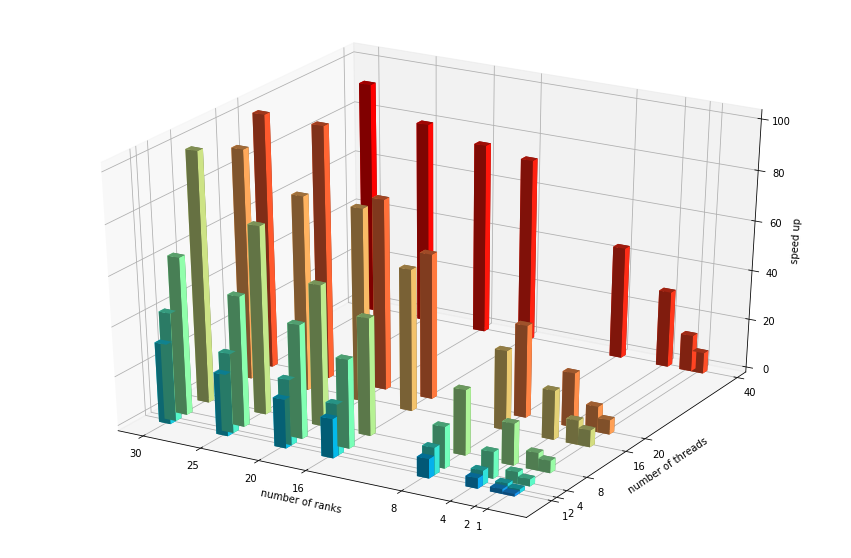

In [7]:
# linear scale

fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
colors = cm.rainbow([0.2 + (1-0.2)/(len(rank)-1)*i for i in range(len(rank))])

width = 1
ax.bar3d(np.array(rank) - width,
         np.array(threads) - 2*width,
         [0] * len(speed_up),
         width, width, speed_up, colors)

ax.invert_xaxis()
ax.set_xticks(num_ranks)
ax.set_xlabel('number of ranks')

ax.set_yticks(num_threads)
ax.set_ylabel('number of threads')

ax.set_zlabel('speed up')

plt.show()